# RAMP: Picture Reconstruction Challenge
*Alexia Allal, Gabriel Buffet, Jérémy Pinault, Nicolas Giraudet de Boudemange, Sébastien Mandela Yvon, Stéphane Dumas, from IPP/M2DS*

<div>
<table style="width:100%; background-color:white;">
  <tr style="background-color:white;">
    <td align="left"; style="background-color:white; width: 100%;">
        <a href="https://www.ip-paris.fr/">
            <img src="https://www.ip-paris.fr/voeux2022-telecomparis/images/logos_ecoles.png" width="1000px"/>
        </a>
    </td>
  </tr>
 </table>
</div>


## Table of Contents
* [Introduction](#introduction)
  * [Context](#context)
  * [Why Image Super-Resolution ?](#why-image-super-resolution)
  * [Challenge Objective](#challenge-objective)
  * [Evaluation Criteria](#evaluation-criteria)
* [The dataset](#dataset)
* [Setup](#setup)
  * [Prerequisites](#prerequisites)
* [Data exploration](#exploration)
  * [Data download](#download)
  * [Visualize data](#visualize)
* [Solutions](#solutions)
  * [A dummy solution](#dummy)
  * [A simple solution](#simple)
  * [A deep learning approach](#deep-learning-approach)
* [Scoring](#scoring)
* [Submitting on RAMP](#submitting)

## Introduction <a class="anchor" id="introduction"></a>

The Image Super-Resolution Challenge: Picture Reconstruction presents a unique opportunity for participants to explore the interesting field of image processing and computer vision. We propose a task which involves elevating the resolution of a given 64x64 grayscale image to a higher fidelity 128x128 version through advanced picture reconstruction techniques. This challenge addresses a fundamental problem with applications ranging from medical imaging to surveillance and beyond.To complete this task, participants should propose (preferably neural network) approaches which allow the enhancement of image details in a given picture to yield a higher resolution version of it. 

### Context <a class="anchor" id="context"></a>

In real-world scenarios, low-resolution images are commonplace due to various factors such as hardware constraints, bandwidth limitations, or the inherent nature of image acquisition devices. Enhancing these low-resolution images to a higher resolution is a fundamental requirement in numerous applications, including medical imaging, surveillance, satellite imagery, and more. By upscaling a 64x64 grayscale image to a finer 128x128 resolution, participants will be addressing a practical problem with wide-ranging implications.

### Why Image Super-Resolution? <a id="why-image-super-resolution"></a>

1. **Detail Recovery:** Super-resolved images provide a clearer and more detailed view of the content, allowing better visual perception and interpretation.

2. **Enhanced Visual Quality:** The ability to generate high-quality, visually appealing images contributes to improved user experience in various applications.

3. **Data Compression:** Super-resolution techniques can be instrumental in reducing storage requirements by storing lower resolution images and generating higher resolution versions on-demand.

4. **Better Recognition and Analysis:** Higher resolution images are often essential for accurate object recognition, classification, and analysis in computer vision tasks.

### Challenge Objective <a class="anchor" id="challenge-objective"></a>

The primary objective of this challenge is to develop an image super-resolution model capable of upscaling a 64x64 grayscale image to a more refined 128x128 resolution. Participants are encouraged to leverage state-of-the-art techniques, including deep learning architectures, to achieve superior results.

### Evaluation Criteria <a class="anchor" id="evaluation-criteria"></a>

Participants will be assessed based on the fidelity of their super-resolved images compared to ground truth high-resolution images. Quantitative metrics such as Root Mean Squared Error ([RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html)) and Structural Similarity Index ([SSI](https://scikit-image.org/docs/stable/auto_examples/transform/plot_ssim.html)) will be used to evaluate the performance of the submissions. More details in the [Scoring](#scoring) section.


## The dataset <a class="anchor" id="dataset"></a>

The Unsplash Dataset is made up of over 350,000+ contributing global photographers and data sourced from hundreds of millions of searches across a nearly unlimited number of uses and contexts. Due to the breadth of intent and semantics contained within the Unsplash dataset, it enables new opportunities for research and learning.

The Unsplash Dataset is offered in two datasets:

* the Lite dataset: available for commercial and noncommercial usage, containing 25k nature-themed Unsplash photos, 25k keywords, and 1M searches
* the Full dataset: available for noncommercial usage, containing 5.4M+ high-quality Unsplash photos, 5M keywords, and over 250M searches

As the Unsplash library continues to grow, we’ll release updates to the dataset with new fields and new images, with each subsequent release being [semantically versioned](https://semver.org/).

For more on the Unsplash Dataset, see the [announcement](https://unsplash.com/blog/the-unsplash-dataset/) and [site](https://unsplash.com/data).


For this challenge, we use the Lite dataset. We preprocess the images into 2 different resolutions :
* (64, 64), which is the low resolution input image.
* (128, 128), the corresponding high resolution target.

To avoid overuse of memory, both versions are in grayscale format, which means with a single channel.

The participant are therefore provided with a public dataset of 6000 pictures pairs, split into train : 5000 and test 1000.



## Setup <a class="anchor" id="setup"></a>

### Prerequisites <a class="anchor" id="prerequisites"></a>
The following cell will install the required package dependencies, if necessary. You can examine the file, `requirements.txt`, included in the repo to view the list of dependencies.


In [19]:
import sys
!{sys.executable} -m pip install -r requirements.txt

'c:\Users\S�bastien' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
#!pip install -r requirements.txt

  Using cached scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached ramp-0.1.4-py3-none-any.whl
  Using cached gdown-5.1.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.1-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached ramp_workflow-0.6.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached scikit_image-0.22.0-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached torch-2.2.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Using cached torchvision-0.17.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached filelock

In [8]:
## Libraries
import numpy as np
import os
import matplotlib.pyplot as plt

np.random.seed(313)


## Data exploration <a class="anchor" id="exploration"></a>

### Data download <a class="anchor" id="download"></a>

Data are available on a public drive that we can retrieve by running the download_data script

In [9]:
# Uncomment the following line to download data:
import download_data
download_data.data_load()

Data loading


Retrieving folder contents


Processing file 1cB9XYcRV6rzMzXGn8NqAO3HgkSMV-9lQ data.tgz


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1cB9XYcRV6rzMzXGn8NqAO3HgkSMV-9lQ
From (redirected): https://drive.google.com/uc?id=1cB9XYcRV6rzMzXGn8NqAO3HgkSMV-9lQ&confirm=t&uuid=b2000054-6c9e-4ec3-a603-d210c51cbbd6
To: c:\Users\Sébastien Mandela\OneDrive\Documents\École Polytechnique\4A\Datacamp\project_datacamp\picture_reconstruction\data\data.tgz
100%|██████████| 185M/185M [00:17<00:00, 10.7MB/s] 
Download completed


Unzip completed


We can now load the images data that are conveniently preprocessed and stored into numpy arrays. We have 5000 images in the train set and 1000 images in the test set

In [10]:
data_repo = 'data/public/'
X_train = np.load(data_repo + 'Xtrain.npy') 
Y_train = np.load(data_repo + 'Ytrain.npy') 
X_test = np.load(data_repo + 'Xtest.npy')
Y_test = np.load(data_repo + 'Ytest.npy')
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5000, 64, 64), (5000, 128, 128), (1000, 64, 64), (1000, 128, 128))

We then normalize the data into float32 arrays, for conveniency.

In [11]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
Y_train = Y_train.astype('float32') / 255.0
Y_test = Y_test.astype('float32') / 255.0

print(X_train.min(), X_train.max(), Y_train.min(), Y_train.max())

0.0 1.0 0.0 1.0


### Visualize data <a class="anchor" id="visualize"></a>

Now that we have the data loaded, we can visualize a low-resolution image with its expected high resolution version

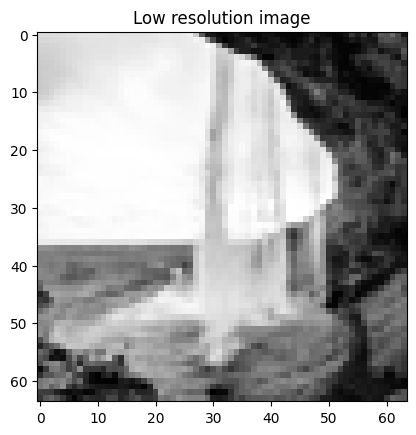

In [12]:
img_idx = 724

img_lo = X_test[img_idx]
imgplot = plt.imshow(img_lo, cmap='gray')
plt.title('Low resolution image')
plt.show()



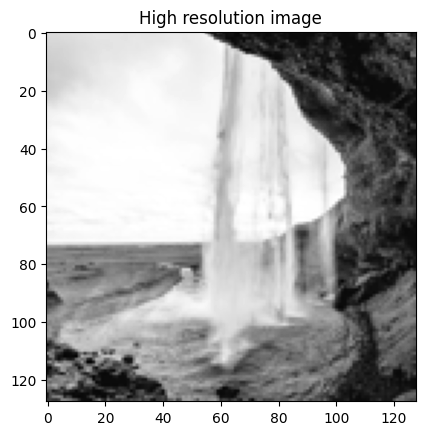

In [13]:
img_hi=Y_test[img_idx]
imgplot = plt.imshow(img_hi, cmap='gray')
plt.title('High resolution image')
plt.show()

And a few other examples to have an overview of the train set...

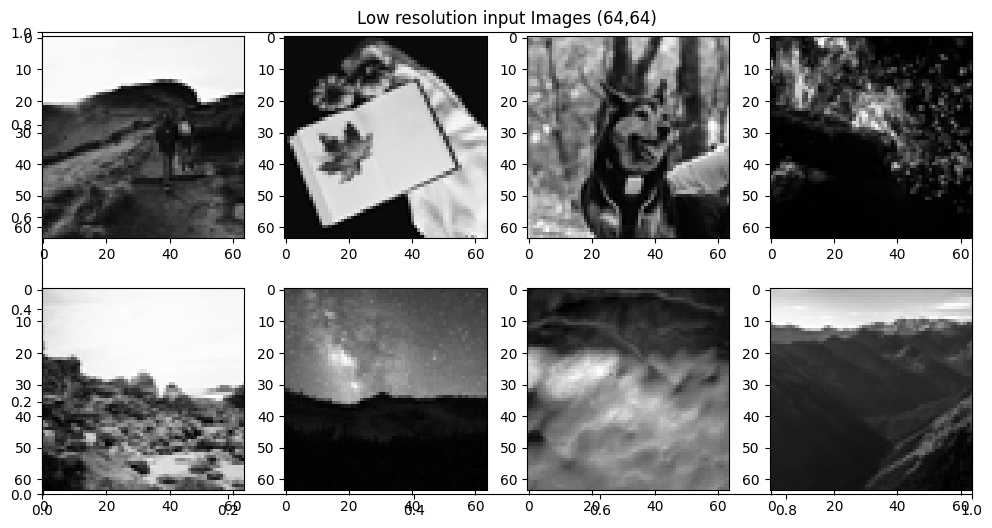

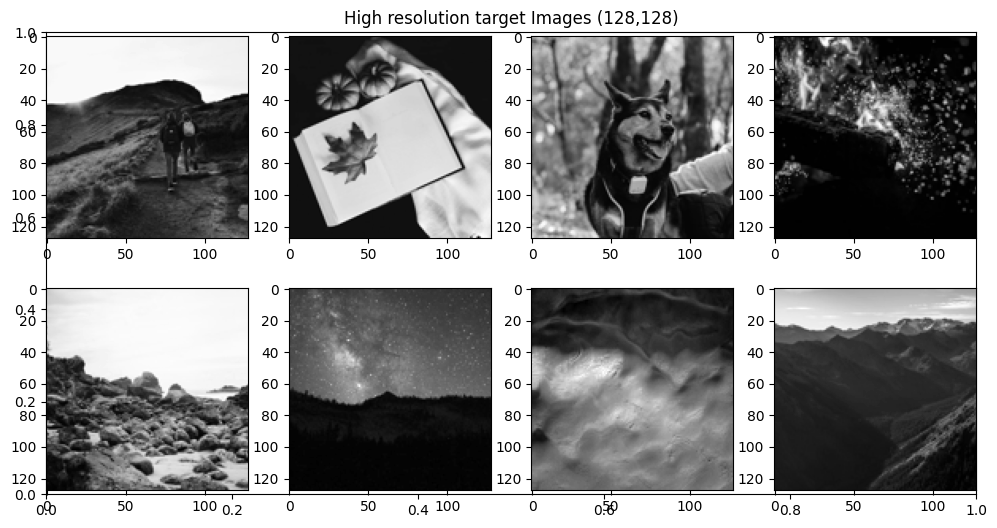

In [14]:
indices = np.random.randint(0, 128, 8)
plt.figure(figsize=(12, 6))
plt.title('Low resolution input Images (64,64)')
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
plt.show()

plt.figure(figsize=(12, 6))
plt.title('High resolution target Images (128,128)')
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(Y_train[idx], cmap='gray')
plt.show()



As you can see, both pictures do not have the same resolution and therefore not the same shape:

In [15]:
print("image High Resolution shape: ", img_hi.shape)
print("image Low Resolution shape: ", img_lo.shape)


image High Resolution shape:  (128, 128)
image Low Resolution shape:  (64, 64)


## Solutions <a class="anchor" id="solutions"></a>

This section will show you two ideas of solutions to reconstruct the high resolution images. The first one is the dummiest, which consists in predicting a random value between 0 and 1 for each pixel. The second one however, proposes a skeleton for neural network implementation strategy, as we highly encourage participant to focus on the core model architecture. 

Besides, these two estimators can be found in The starting kit in the "submissions" folder. There, you'll find a file, estimator.py, which RAMP expects to have a BaseEstimator defined. The class is intentionally barebones, and is a good starting place for your own estimators. You can use the sample estimators as a template for your own estimators. See more details in [ramp test a submission](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html)

The fitting methods, fit and fit_partial are related to fitting your estimator to the data.
- fit expects to be given the entirety of the data to fit. 
- fit_partial behaves similarly, but instead assumes that not all data is being presented at once. It is used in iterative fitting (e.g. stochastic gradient descent). This method is required in the case where you are not able to fit all the data in memory.

### A dummy solution <a class="anchor" id="dummy"></a>

(128, 128)


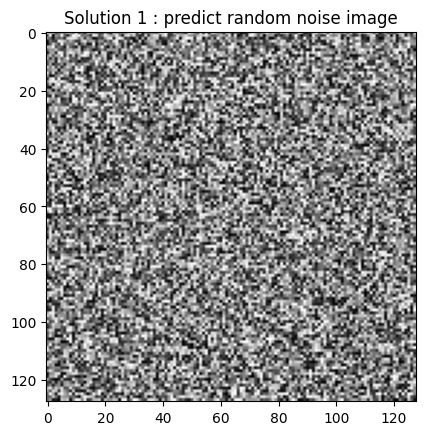

In [16]:
import numpy as np

img_random = np.random.uniform(0, 1, size=img_hi.shape)
print(img_random.shape)
plt.imshow(img_random, cmap='gray')
plt.title('Solution 1 : predict random noise image')
plt.show()

### Another solution  <a class="anchor" id="simple"></a>

We can quite easily reshape the image to come back to the original resolution. However, this approach is not encouraged as it does not involve Machine Learning strategies


Shape of original image:  (128, 128)
Shape of reconstructed image:  (128, 128)


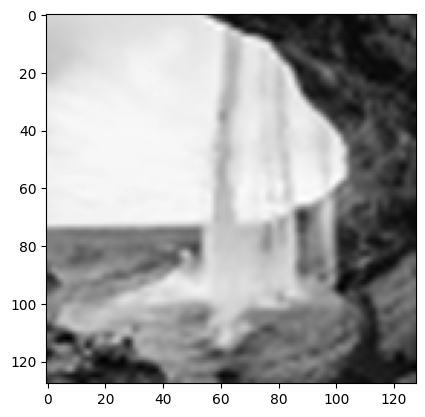

In [17]:
import scipy.ndimage

size_factor = img_hi.shape[0] / img_lo.shape[0]
img_resized = scipy.ndimage.zoom(img_lo , (size_factor, size_factor), order=3)
print("Shape of original image: ", img_hi.shape)
print("Shape of reconstructed image: ", img_resized.shape)
imgplot = plt.imshow(img_resized, cmap='gray')

This version will constitute the reference baseline for the challenge

### Deep Learning apporach  <a class="anchor" id="deep-learning-approach"></a>

We finally propose a dummy neural network architecture to perform the reconstruction. Note that the proposed model rigidly depends on the input and target resolutions, and not on only the scaling ratio. One might consider fixing that inconvenience.

Besides, the training setup can be seen as a multitarget regression problem, as the reconstructed image should be pixel-wise as close as possible to the target image. For ramp compatibility reasons, the target and recontructed images are resized into (N, H*W) for the scoring. This is already done in the get_data() method from problem.py, so it is not necessary when running the ramp-test command.
 

In [18]:
Y_train = Y_train.reshape(-1, 128*128)
Y_test = Y_test.reshape(-1, 128*128)

In [19]:
import numpy as np
import torch  
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from torchvision import transforms, models

from tqdm import tqdm
from sklearn.base import BaseEstimator

class SuperResolutionNet(nn.Module):
    def __init__(self, n_channels):
        super(SuperResolutionNet, self).__init__()
        self.upconv = nn.ConvTranspose2d(
            in_channels=1, out_channels=1, kernel_size=4, stride=2,padding=1             
        )

        
    def forward(self, x):
        ## x.shape = [B, 64, 64]
        x = x.unsqueeze(1)
        x = self.upconv(x) # [B, 1, 128, 128]
        x = x.view(-1, 128*128) # [B, 128*128]
    
        return x ## [B, 128 * 128]
        

class Regressor(BaseEstimator):
    def __init__(self, n_channels=1, n_epochs=2, batch_size=8, lr=0.001):
        self.n_channels = n_channels 
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.lr = lr
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def fit(self, X, y):
        ## X.shape = [B, 64, 64]
        ## y.shape = [B, 128 * 128]
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)
        
        self.model = SuperResolutionNet(self.n_channels)
        self.model.to(self.device)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        
        ## convert Y to grayscale (Not necessary if Y is already grayscale)
        # transform_Y = transforms.Compose([transforms.Grayscale(num_output_channels=1)])
        # y = transform_Y(y.permute(0,3,1,2)).view(-1, 128, 128) ## [B, 128, 128]
        
        ## select only the first channel on X
        # X = X[:, :, :, 0]
            
        trainset = TensorDataset(X, y)
        trainloader = DataLoader(trainset, batch_size=self.batch_size, shuffle=True, num_workers=2) 
        for epoch in range(self.n_epochs):
            running_loss = 0.0
            for data in tqdm(trainloader):
                inputs, labels = data ## inputs.shape = [B, 64, 64], labels.shape = [B, 128*128]
                inputs, labels = inputs.to(self.device), labels.to(self.device) 
                optimizer.zero_grad()
                outputs = self.model(inputs) ## [B, 128*128]
                # print(outputs.shape)
                # print(labels.shape)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            print(f'Epoch {epoch+1}/{self.n_epochs}, Loss: {running_loss/len(trainloader)}')

    def predict(self, X):
        ## X.shape = [B, 64, 64]
        X = torch.tensor(X, dtype=torch.float32)
        # X = X[:, :, :, 0]
        
        testloader = DataLoader(X, batch_size=self.batch_size, shuffle=False, num_workers=2)
        y_pred = []
        self.model.eval()
        with torch.no_grad():
            for images in testloader:
                images = images.to(self.device)
                outputs = self.model(images) ## [B, 128*128]
                y_pred.extend(outputs.cpu().numpy()) ## [B, 128*128]
        return np.array(y_pred).reshape(X.shape[0], -1) ## [test_size, 128*128]
    


In [20]:
## We can now train the model
regressor = Regressor(n_epochs=10, batch_size=32, lr=0.001)
regressor.fit(X_train, Y_train)


  0%|          | 0/157 [00:00<?, ?it/s]

100%|██████████| 157/157 [00:04<00:00, 32.76it/s]


Epoch 1/10, Loss: 0.15800275670210268


100%|██████████| 157/157 [00:04<00:00, 33.31it/s]


Epoch 2/10, Loss: 0.0482837551623393


100%|██████████| 157/157 [00:04<00:00, 32.34it/s]


Epoch 3/10, Loss: 0.026514818808835022


100%|██████████| 157/157 [00:05<00:00, 27.86it/s]


Epoch 4/10, Loss: 0.01809162384931259


100%|██████████| 157/157 [00:06<00:00, 24.56it/s]


Epoch 5/10, Loss: 0.012898945771632302


100%|██████████| 157/157 [00:05<00:00, 27.93it/s]


Epoch 6/10, Loss: 0.009443791209465


100%|██████████| 157/157 [00:05<00:00, 27.30it/s]


Epoch 7/10, Loss: 0.007268691998995413


100%|██████████| 157/157 [00:05<00:00, 31.00it/s]


Epoch 8/10, Loss: 0.005980173380938685


100%|██████████| 157/157 [00:04<00:00, 31.71it/s]


Epoch 9/10, Loss: 0.005216466429032338


100%|██████████| 157/157 [00:05<00:00, 30.00it/s]

Epoch 10/10, Loss: 0.004753734541250167


In [21]:
## And predict on the test set
Y_pred = regressor.predict(X_test)
Y_pred = Y_pred.reshape(-1, 128, 128)

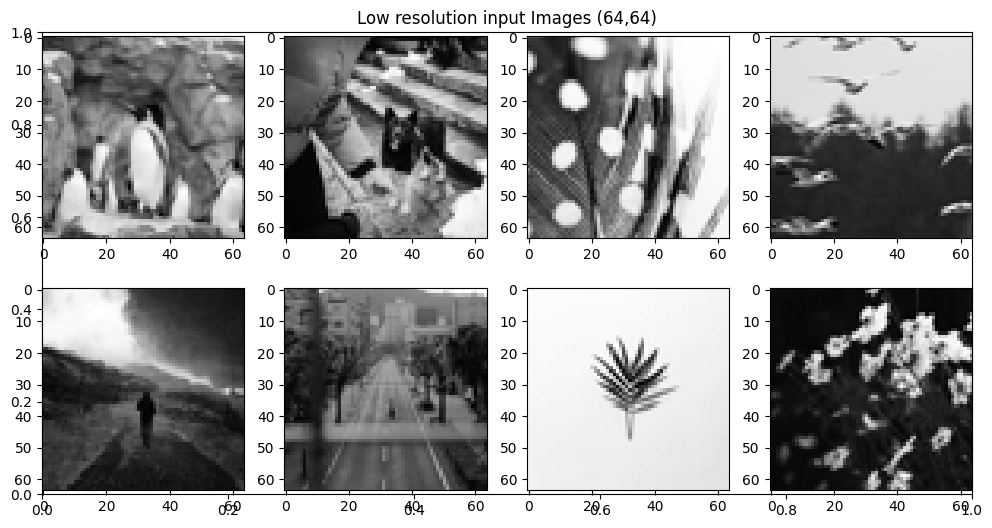

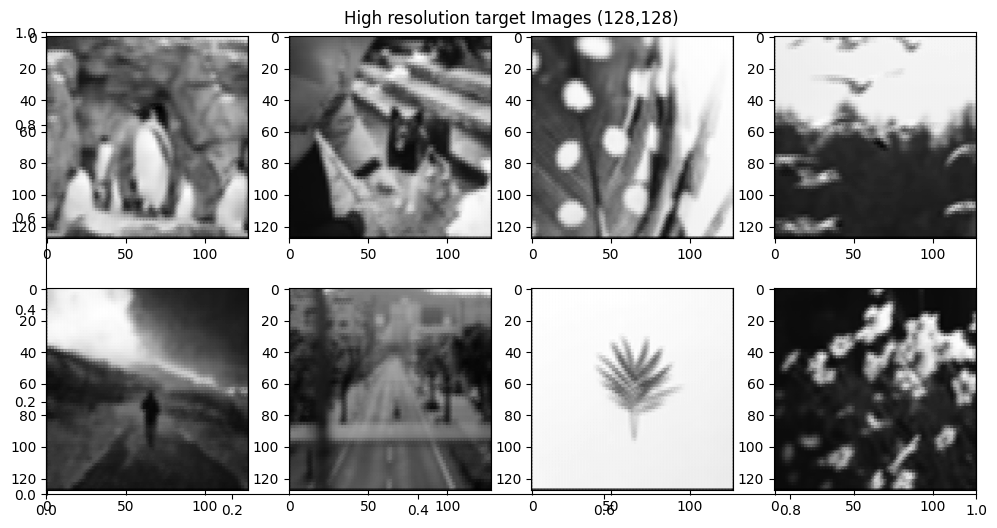

In [22]:
## Let's visualize the predicted
indices = np.random.randint(0, Y_test.shape[0], 8)
plt.figure(figsize=(12, 6))
plt.title('Low resolution input Images (64,64)')
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
plt.show()

plt.figure(figsize=(12, 6))
plt.title('High resolution target Images (128,128)')
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i + 1)
    plt.imshow(Y_pred[idx], cmap='gray')
plt.show()

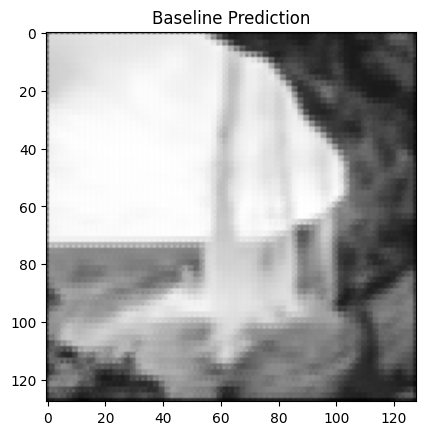

In [23]:
image_nn = Y_pred[img_idx]
imgplot = plt.imshow(image_nn, cmap='gray')
plt.title('Baseline Prediction')
plt.show()

## Scoring <a class="anchor" id="scoring"></a>

As said before, to evaluate the the proposed solution, we consider the two following metrics :
### Root Mean Squared Error (RMSE)

The Root Mean Squared Error (RMSE) is a metric commonly used to quantify the average difference between pixel values in the original and reconstructed images. It measures the overall accuracy of the reconstruction. The formula for RMSE is given by:


$ RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (I_{\text{original}}(i) - I_{\text{reconstructed}}(i))^2} $

Where:
- $N$ is the total number of pixels in the image.
- $I_{\text{original}}(i)$ is the pixel value at position $i$ in the original image.
- $I_{\text{reconstructed}}(i)$ is the corresponding pixel value in the reconstructed image.

Lower RMSE values indicate better reconstruction, representing smaller differences between the original and reconstructed images.

### Structural Similarity Index (SSI)

The Structural Similarity Index (SSI) is a metric that evaluates the similarity between two images in terms of luminance, contrast, and structure. It provides a more comprehensive measure than RMSE, considering perceptual aspects of the images. The formula for SSI is as follows:

$ SSI = \frac{{(2 \mu_{\text{original}} \mu_{\text{reconstructed}} + C_1) \cdot (2 \sigma_{\text{original}\text{reconstructed}} + C_2)}}{{(\mu_{\text{original}}^2 + \mu_{\text{reconstructed}}^2 + C_1) \cdot (\sigma_{\text{original}}^2 + \sigma_{\text{reconstructed}}^2 + C_2)}} $

Where:
- $\mu_{\text{original}}$ and $\mu_{\text{reconstructed}}$ are the means of the original and reconstructed images.
- $\sigma_{\text{original}}$ and $\sigma_{\text{reconstructed}}$ are the standard deviations of the original and reconstructed images.
- $\sigma_{\text{original}\text{reconstructed}}$ is the covariance between the original and reconstructed images.
- $C_1$ and $ C_2$ are constants to stabilize the division.

SSI ranges from -1 to 1, where 1 indicates perfect similarity. Higher SSI values correspond to better image reconstruction, capturing both global and local structural information.

Both RMSE and SSI provide valuable insights into the quality of image reconstructions, with RMSE focusing on pixel-wise differences and SSI considering perceptual aspects of the images. Integrating both metrics can offer a comprehensive evaluation of the reconstruction performance.


In [24]:
rmse_random = np.sqrt(np.sum((img_random - img_hi)**2) / img_hi.size)
rmse_resized = np.sqrt(np.sum((img_resized - img_hi)**2) / img_hi.size)
rmse_nn = np.sqrt(np.sum((image_nn - img_hi)**2) / img_hi.size)
print("rmse random image (dummy): ", rmse_random)
print("rmse resized image (easy) : ", rmse_resized)
print("rmse baseline image : ", rmse_nn)


rmse random image (dummy):  0.43707759320316364
rmse resized image (easy) :  0.03937749518424442
rmse baseline image :  0.06803006484081822


In [25]:
## Now the ssim score
from skimage.metrics import structural_similarity as ssim

ssim_random = ssim(img_random, img_hi, data_range=img_hi.max() - img_hi.min())
ssim_resized = ssim(img_resized, img_hi, data_range=img_hi.max() - img_hi.min())
ssim_nn = ssim(image_nn, img_hi, data_range=img_hi.max() - img_hi.min())
print("ssim random image (dummy): ", ssim_random)
print("ssim resized image (easy) : ", ssim_resized)
print("ssim baseline image : ", ssim_nn)

ssim random image (dummy):  0.004626327714739254
ssim resized image (easy) :  0.8897385513032037
ssim baseline image :  0.7864481771250124


The scores of the resized strategy are the ones to beat. 

## Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you build a good model, you can submit it to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event [picture_reconstruction](http://www.ramp.studio/events/picture_reconstruction2024). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/tephra_datacamp2023/sandbox) and write the code for your classifier directly on the browser. You can also create a new folder `my_submission` in the `submissions` folder containing `regressor.py` and upload this file directly. You can check the starting-kit ([`regressor.py`](/edit/submissions/starting_kit/classifier.py)) to see some examples. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/tephra_datacamp2023/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/tephra_datacamp2023/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score might be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/tephra_datacamp2023/leaderboard)) is the balenced accuracy score (`bal_acc`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [26]:
import numpy as np


class Regressor():
    """
    Dummy regressor
    Gives random predictions
    """
    def __init__(self):
        pass

    def fit(self, X, y):
        self.target_size = y.shape[1]
        return

    def predict(self, X):
        return np.random.uniform(0,1, (X.shape[0],self.target_size) ) 

You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [27]:
# nt for Windows os
if os.name == 'nt':
    !ramp-test --ramp-data-dir ".\data\public" --submission randomdummy
# posix for Linux and Mac os
elif os.name == 'posix':
    !ramp-test --ramp-data-dir "./data/public" --submission randomdummy

Testing picture_reconstruction
Reading train and test files from .\data\public/data/ ...
Reading cv ...
Training submissions\randomdummy ...
CV fold 0
	score    RMSE    SSIM      time
	train  0.4089  0.0057  0.168904
	valid  0.4080  0.0054  0.875800
	test   0.4084  0.0058  0.189639
CV fold 1
	score    RMSE    SSIM      time
	train  0.4091  0.0055  0.206858
	valid  0.4073  0.0056  0.920099
	test   0.4083  0.0056  0.194166
CV fold 2
	score    RMSE    SSIM      time
	train  0.4085  0.0056  0.232185
	valid  0.4091  0.0055  1.093331
	test   0.4082  0.0058  0.199648
CV fold 3
	score    RMSE    SSIM      time
	train  0.4080  0.0056  0.152831
	valid  0.4103  0.0055  1.082027
	test   0.4082  0.0059  0.214371
----------------------------
Mean CV scores
----------------------------
	score              RMSE            SSIM        time
	train  0.4087 ± 0.00041  0.0056 ± 6e-05  0.2 ± 0.03
	valid  0.4087 ± 0.00115  0.0055 ± 7e-05   1.0 ± 0.1
	test     0.4083 ± 8e-05  0.0058 ± 9e-05  0.2 ± 0.01
------

## More information

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.

## Questions

Questions related to the starting kit should be asked on the issue tracker.